# Classification algorithm to classify the image correctly 

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')

# The MNIST database is a large database of handwritten digits that is commonly used for 
#training various image processing systems

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn import svm

In [6]:
x, y = mnist['data'], mnist['target']

print('rows: ', len(x)) #-- 70000
print('columns: ', len(x[0])) #--784

rows:  70000
columns:  784


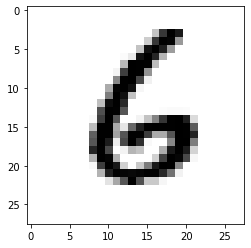

In [7]:
random_digit = x[6000]
some_random_digit = random_digit.reshape(28,28)  # Gives a new shape to an array without changing its data (784 = 28 * 28).
plt.imshow(some_random_digit, cmap = matplotlib.cm.binary, interpolation="nearest") # Display data as an image in 2d 

In [8]:
# Splitting into train and test 

x_train, x_test = x[:6000], x[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [9]:
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [10]:
#  Classification model to test if the number or image is a 2 or not. 
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

Fitting Logistic Regression model 

In [11]:
clf= LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [12]:
y_pred=clf.predict([random_digit])
y_pred # correct since the random digit was 6 

array([False])

In [13]:
#check accuracy using cross validation
logisticModelAccuracy = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
logisticModelAccuracy.mean()

0.9554999999999999

Fitting Support vector machine Algo to correctly classify the random digit 

In [14]:
clf = svm.SVC()
clf.fit(x_train, y_train_2)

SVC()

In [15]:
y_pred = clf.predict([random_digit])
y_pred  # correct since the random digit was 6 

array([False])

In [16]:
#check accuracy using cross validation
svmModelAccuracy = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
svmModelAccuracy.mean()

0.9851666666666666

Conclusion: SVM shows better accuracy than Logistic Regression in correctly classifying the image